In [1]:
#Datapane will be used create a personal report for this code. Sign up on Datapane to get the token and sign in.

from IPython.display import Javascript

def window_open(url):
    display(Javascript('window.open("{url}");'.format(url=url)))

window_open('https://datapane.com/home')

<IPython.core.display.Javascript object>

In [2]:
token = input('Insert your token after signing in Datapane ')
print('Your token is', token)

Insert your token after signing in Datapane 0b2196d2bdbb6d7cf4956040973249e3723cd0b3
Your token is 0b2196d2bdbb6d7cf4956040973249e3723cd0b3


In [3]:
!datapane login --server=https://datapane.com/ --token=$token

Logged in to https://datapane.com/ as saidakbar


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
#print(os.listdir("../input"))
import warnings
warnings.filterwarnings("ignore")

# Data preprocessing

In [6]:
hsales = pd.read_csv('nyc-rolling-sales.csv') 

In [7]:
hsales.shape

(84548, 22)

In [8]:
# let's check what we have 
hsales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


According to this official [page](https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf), Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now. 

In [9]:
hsales.drop(['Unnamed: 0', 'EASE-MENT'],1, inplace=True)

In [10]:
hsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [11]:
#First, let's check which columns should be categorical
print('Column name')
for col in hsales.columns:
    if hsales[col].dtype=='object':
        print(col, hsales[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [12]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    hsales[col] = pd.to_numeric(hsales[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    hsales[col] = hsales[col].astype('category')

hsales['SALE DATE'] = pd.to_datetime(hsales['SALE DATE'], errors='coerce')

Our dataset is ready for checking missing values.

In [13]:
missing = hsales.isnull().sum()/len(hsales)*100

print(pd.DataFrame([missing[missing>0],pd.Series(hsales.isnull().sum()[hsales.isnull().sum()>1000])], index=['percent missing','how many missing']))


                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing. Below graph indicates which parts of the table are missing values in yellow.

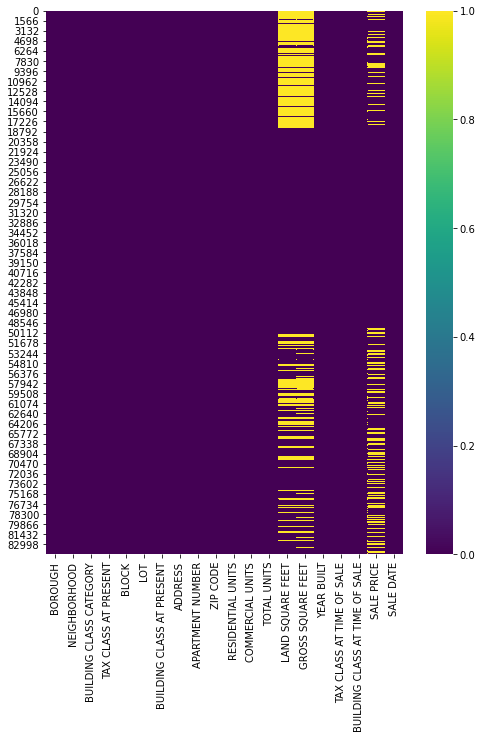

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,10))
sns.heatmap(hsales.isnull(),cmap='viridis')

Based on the missing values heatmap, we can see that some of the missing values in LAND SQUARE FEET exists in GROSS SQUARE FEET and vice versa. Assuming these two column values are close to each other, we can fill missing value from one another.

In [20]:
# let us check for outliers first
hsales[['LAND SQUARE FEET','GROSS SQUARE FEET']].describe()

,LAND SQUARE FEET,GROSS SQUARE FEET
count,5.829600e+04,5.693600e+04
mean,3.941676e+03,4.045707e+03
std,4.198397e+04,3.503249e+04
min,0.000000e+00,0.000000e+00
25%,1.650000e+03,1.046750e+03
50%,2.325000e+03,1.680000e+03
75%,3.500000e+03,2.560000e+03
max,4.252327e+06,3.750565e+06


There are outliers in the lower and upper bound of the columns. We will set an upper bound of 75% for our dataset as maximum since 75th percentile of the dataset represents a good cutoff for majority of houses' square feet metrics.

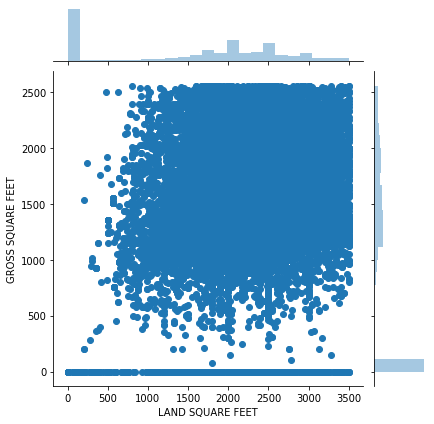

In [21]:
sns.jointplot(x='LAND SQUARE FEET', y='GROSS SQUARE FEET', data=hsales[(hsales['LAND SQUARE FEET']<=3500)& (hsales['GROSS SQUARE FEET']<=2560)], kind='scatter')

It is hard to notice any correlation from the scatter plot. Below is the correlation matrix.

In [22]:
hsales[(hsales['LAND SQUARE FEET']<=3500)& (hsales['GROSS SQUARE FEET']<=2560)][['LAND SQUARE FEET','GROSS SQUARE FEET']].corr()

,LAND SQUARE FEET,GROSS SQUARE FEET
LAND SQUARE FEET,1.000000,0.796219
GROSS SQUARE FEET,0.796219,1.000000


As we can see from the correlation matrix above, these two columns are positive correlated with r=0.79 (out of 1). We can now fill in the missing value from one column to another, which will help us reduce missing values. 

In [23]:
print(hsales[(hsales['LAND SQUARE FEET'].isnull()) & (hsales['GROSS SQUARE FEET'].notnull())].shape)
print(hsales[(hsales['LAND SQUARE FEET'].notnull()) & (hsales['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1372 rows that can be filled in with their approximate values.

In [24]:
hsales['LAND SQUARE FEET'] = hsales['LAND SQUARE FEET'].mask((hsales['LAND SQUARE FEET'].isnull()) & (hsales['GROSS SQUARE FEET'].notnull()), hsales['GROSS SQUARE FEET'])
hsales['GROSS SQUARE FEET'] = hsales['GROSS SQUARE FEET'].mask((hsales['LAND SQUARE FEET'].notnull()) & (hsales['GROSS SQUARE FEET'].isnull()), hsales['LAND SQUARE FEET'])

In [25]:
#  Check for duplicates before
print(sum(hsales.duplicated()))
hsales[hsales.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)
# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False
# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


The dataframe has 765 duplicated rows (exluding the original rows). 

In [26]:
hsales.drop_duplicates(inplace=True)
print(sum(hsales.duplicated()))

0


In [27]:
missing = hsales.isnull().sum()/len(hsales)*100
print(pd.DataFrame([missing[missing>0],pd.Series(hsales.isnull().sum()[hsales.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE
percent missing          31.091033          31.091033     16.9199
how many missing      26049.000000       26049.000000  14176.0000


We can further impute the square footage of the missing observations from the existing Sale prices. However, doing so would mean some of the property square footages are being predicted by the SALE PRICE. We do not want this to happen because this might result in multicollinearity problem between square footage and SALE PRICE. Nonetheless, let us check how many missing square feet observations can be imputed from SALE PRICE. 

In [28]:
print("The number of non-null prices for missing square feet observations:\n",((hsales['LAND SQUARE FEET'].isnull()) & (hsales['SALE PRICE'].notnull())).sum())

The number of non-null prices for missing square feet observations:
 21154


In [29]:
print("non-overlapping observations that cannot be imputed:",((hsales['LAND SQUARE FEET'].isnull()) & (hsales['SALE PRICE'].isnull())).sum())

non-overlapping observations that cannot be imputed: 4895


In [30]:
hsales[hsales['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

* There are zipcodes with 0 value
* Can block/lot numbers go up to 16322?
* Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
* Other columns also have outliers which needs further investigation.
* Year column has a year with 0
* Most sales prices less than 10000 can be treated as gift or transfer fees.

In [31]:
# for visualization purposes, we replace borough numbering with their string names
hsales['BOROUGH'] = hsales['BOROUGH'].astype(str)
hsales['BOROUGH'] = hsales['BOROUGH'].str.replace("1", "Manhattan")
hsales['BOROUGH'] = hsales['BOROUGH'].str.replace("2", "Bronx")
hsales['BOROUGH'] = hsales['BOROUGH'].str.replace("3", "Brooklyn")
hsales['BOROUGH'] = hsales['BOROUGH'].str.replace("4", "Queens")
hsales['BOROUGH'] = hsales['BOROUGH'].str.replace("5", "Staten Island")


In [32]:
hsales['BOROUGH'].value_counts()

Queens           26548
Brooklyn         23843
Manhattan        18102
Staten Island     8296
Bronx             6994
Name: BOROUGH, dtype: int64

# Data visualization

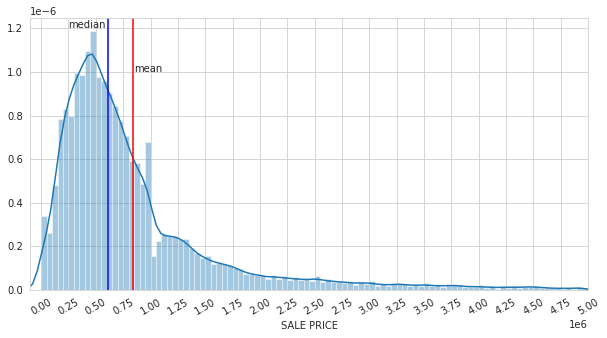

In [33]:
# house prices greater than 5 mln probably represents outliers.
import matplotlib.ticker as ticker

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plotd = sns.distplot(hsales[(hsales['SALE PRICE']>100) & (hsales['SALE PRICE'] < 5000000)]['SALE PRICE'], kde=True, bins=100)

tick_spacing=250000 # set spacing for each tick
plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plotd.set_xlim([-100000, 5000000]) # do not show negative values 
plt.xticks(rotation=30) # rotate x ticks by 30 degrees
plt.axvline(hsales[(hsales['SALE PRICE']>100) & (hsales['SALE PRICE'] < 5000000)]['SALE PRICE'].mean(), c='red')
plt.axvline(hsales[(hsales['SALE PRICE']>100) & (hsales['SALE PRICE'] < 5000000)]['SALE PRICE'].median(), c='blue')
plt.text(250000,0.0000012, "median")
plt.text(850000,0.0000010, "mean")
plt.show()

As we can observe from the distribution plot, prices are skewed to the right. Most of the prices are around 315 and 700 thousands range. The mean is around 750,000 

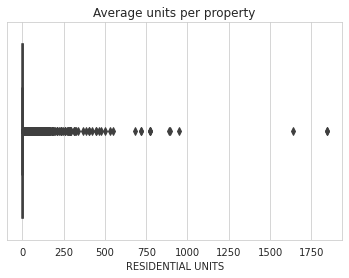

In [34]:
# The dataset seem to have lots of outliers, mainly due to commercial property sales
sns.boxplot(x='RESIDENTIAL UNITS',data=hsales)
plt.title('Average units per property')
plt.show()
#print('not included:', hsales[hsales['RESIDENTIAL UNITS']>10].shape[0], 'properties')

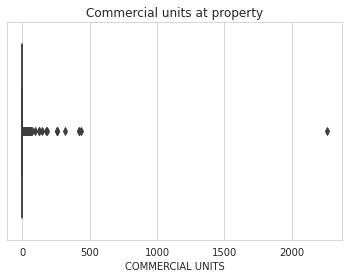

In [35]:
sns.boxplot(x='COMMERCIAL UNITS',data=hsales)
plt.title('Commercial units at property')
plt.show()
#print('not included:', hsales[hsales['COMMERCIAL UNITS']>20].shape[0], 'properties')

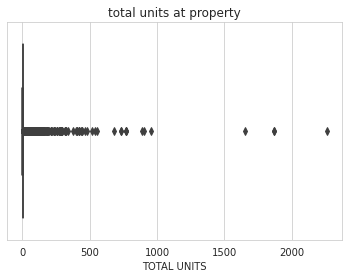

In [36]:
sns.boxplot(x='TOTAL UNITS',data=hsales)
plt.title('total units at property')
plt.show()
#print('not included:', hsales[hsales['TOTAL UNITS']>10].shape[0], 'properties')

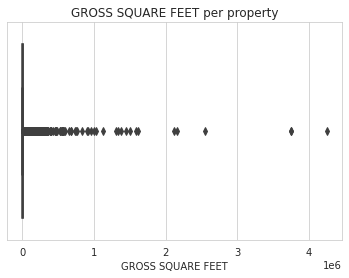

In [37]:
sns.boxplot(x='GROSS SQUARE FEET',data=hsales)
plt.title('GROSS SQUARE FEET per property')
plt.show()
#print('not included:', hsales[hsales['GROSS SQUARE FEET']>20000].shape[0], 'properties')

In [38]:
print("Uneqaul values for total units:", (hsales["TOTAL UNITS"] != hsales['COMMERCIAL UNITS'] + hsales['RESIDENTIAL UNITS']).sum())

Uneqaul values for total units: 2584


In [39]:
hsales[hsales["TOTAL UNITS"] != hsales['COMMERCIAL UNITS'] + hsales['RESIDENTIAL UNITS']]['TOTAL UNITS'].value_counts()

1      2563
2        12
3         4
117       1
9         1
24        1
14        1
4         1
Name: TOTAL UNITS, dtype: int64

These uneqaul values for total unit counts are mostly equal to 1 which might mean they are not residential or commercial units.

In [40]:
hsales[(hsales["TOTAL UNITS"] != hsales['COMMERCIAL UNITS'] + hsales['RESIDENTIAL UNITS']) & (hsales["TOTAL UNITS"]==1)]['BUILDING CLASS CATEGORY'].value_counts()[:5]

44 CONDO PARKING                               1335
43 CONDO OFFICE BUILDINGS                       456
47 CONDO NON-BUSINESS STORAGE                   347
45 CONDO HOTELS                                 167
46 CONDO STORE BUILDINGS                        146
Name: BUILDING CLASS CATEGORY, dtype: int64

As we can observe those properties with 1 total units but with no residential or commercial units are parking, office or storages.

For visualization purposes, we will treat outliers seperately.

In [41]:
dataset = hsales[(hsales['COMMERCIAL UNITS']<20) & (hsales['TOTAL UNITS']<50) & (hsales['SALE PRICE']<5000000) & (hsales['SALE PRICE']>100000) & (hsales['GROSS SQUARE FEET']>0)]

Text(0.5, 1.0, 'Commercial Units vs Sale Price')

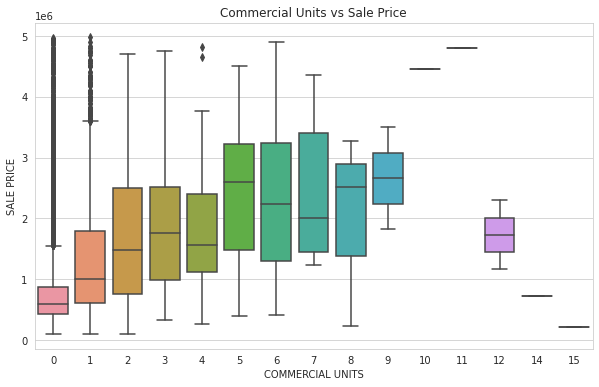

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x='COMMERCIAL UNITS', y="SALE PRICE", data=dataset)
plt.title('Commercial Units vs Sale Price')

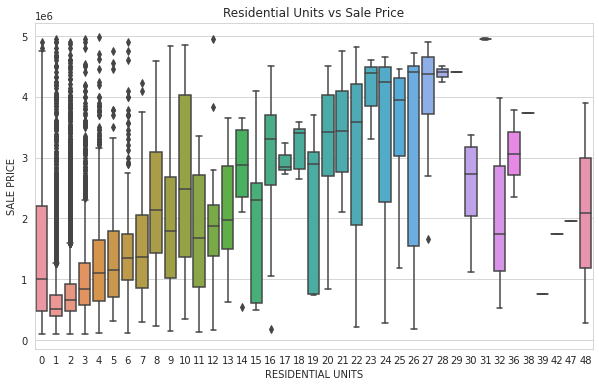

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=dataset)
plt.title('Residential Units vs Sale Price')
plt.show()

In [44]:
dataset[dataset['YEAR BUILT']<1800]['YEAR BUILT'].value_counts()

0    267
Name: YEAR BUILT, dtype: int64

In [45]:
dataset[dataset['YEAR BUILT']<1800]['BUILDING CLASS CATEGORY'].value_counts()[:15]

05 TAX CLASS 1 VACANT LAND                     171
31 COMMERCIAL VACANT LAND                       51
29 COMMERCIAL GARAGES                           21
41 TAX CLASS 4 - OTHER                          13
02 TWO FAMILY DWELLINGS                          2
03 THREE FAMILY DWELLINGS                        2
07 RENTALS - WALKUP APARTMENTS                   2
36 OUTDOOR RECREATIONAL FACILITIES               2
01 ONE FAMILY DWELLINGS                          1
06 TAX CLASS 1 - OTHER                           1
08 RENTALS - ELEVATOR APARTMENTS                 1
14 RENTALS - 4-10 UNIT                           0
18 TAX CLASS 3 - UNTILITY PROPERTIES             0
17 CONDO COOPS                                   0
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT       0
Name: BUILDING CLASS CATEGORY, dtype: int64

Above table brings some new insight into why some properties do not have a year or number of units in them. These are vacant lands, elevators, parking and garages. The question is, do they still have addresses?

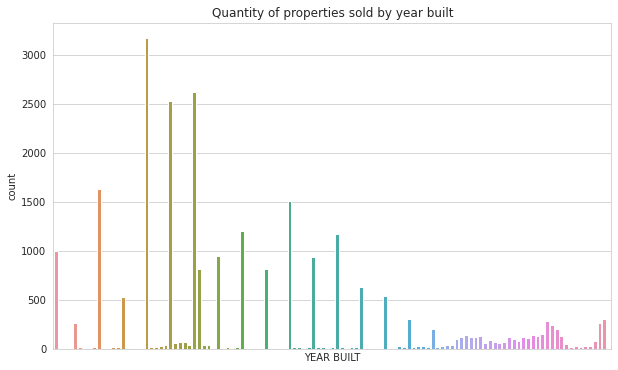

In [46]:
plt.figure(figsize=(10,6))
plotd=sns.countplot(x=dataset[dataset['YEAR BUILT']>1900]['YEAR BUILT'])
#tick_spacing=1 # set spacing for each tick
#plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#plotd.set_xlim([1900, 2020])
plt.tick_params(labelbottom=False)
plt.xticks(rotation=30) 
plt.title("Quantity of properties sold by year built")
plt.show()

Most of the properties were built around 1920s.[](http://)

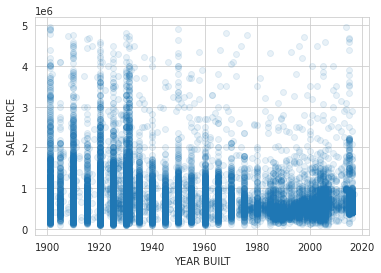

In [47]:
sns.regplot(x='YEAR BUILT', y='SALE PRICE', data=dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5], fit_reg=False, scatter_kws={'alpha':0.1})

* Properties built before 1940 are higher in price.

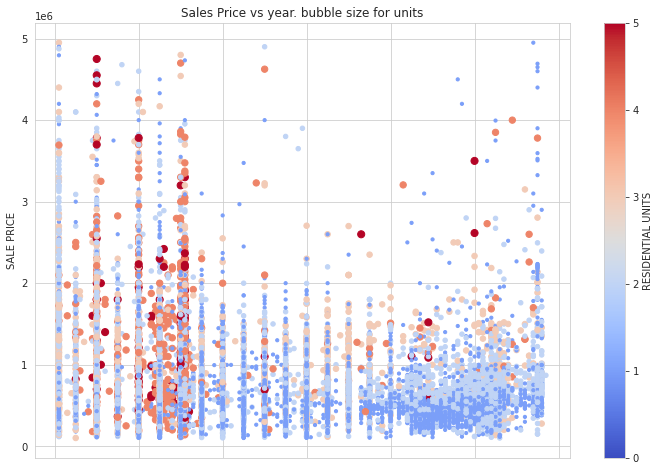

In [48]:
dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5].plot.scatter(x='YEAR BUILT', y='SALE PRICE', c='RESIDENTIAL UNITS', cmap='coolwarm',figsize=(12,8),s=dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5]['RESIDENTIAL UNITS']*10)
plt.title('Sales Price vs year. bubble size for units')
plt.show()

New properties  built after 2000 are sold for relatively cheaper prices compared to houses built in early 1900s.

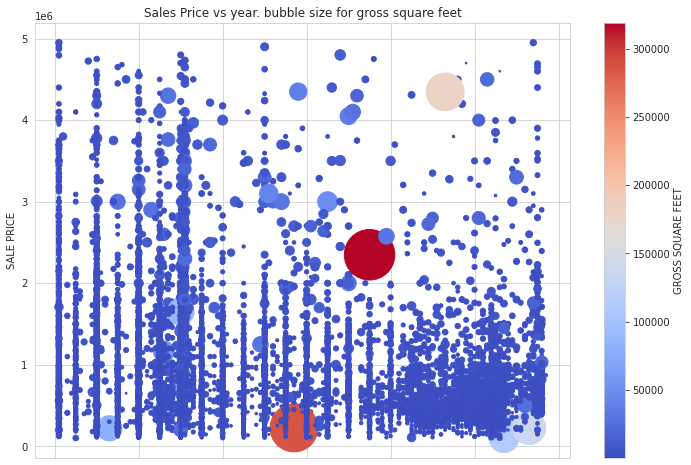

In [49]:
dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5].plot.scatter(x='YEAR BUILT', y='SALE PRICE', c='GROSS SQUARE FEET', cmap='coolwarm',figsize=(12,8),s=dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5]['GROSS SQUARE FEET']*.008)
plt.title('Sales Price vs year. bubble size for gross square feet')
plt.show()

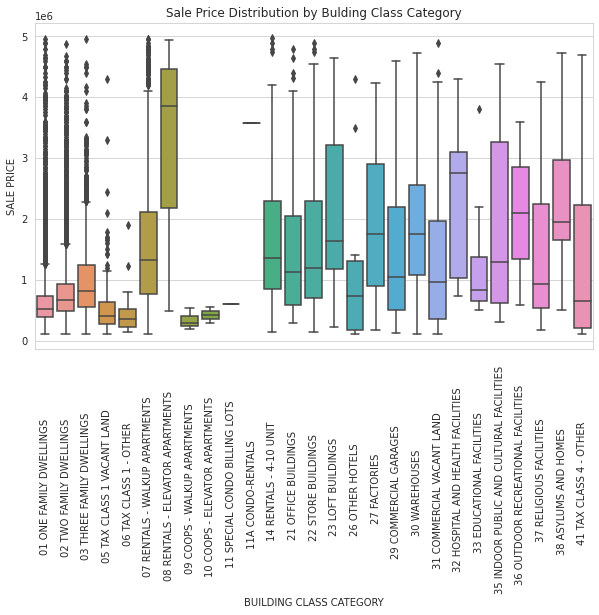

In [50]:
plt.figure(figsize=(10,6))
order = sorted(dataset['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=dataset, order=order)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Bulding Class Category')
plt.show()

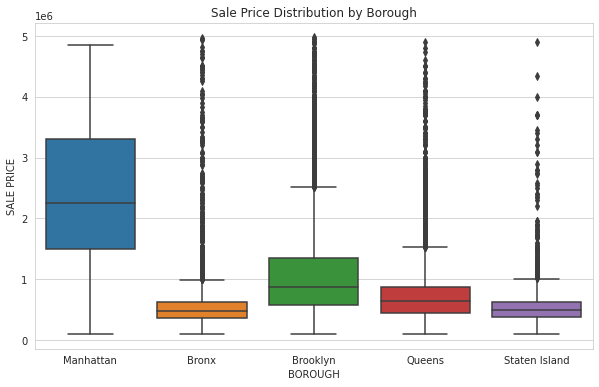

In [51]:
# Sales prices by borough
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=dataset)
plt.title('Sale Price Distribution by Borough')
plt.show()

Most expensive properties are located in Manhattan with median sale price of over 2 million USD for a property. 
Relatively cheaper properties are in Bronx with median property prices of 500,000 USD.

# Map analysis

In [52]:
import folium # library for interactive map drawing

In [53]:
# from geopy.geocoders import Nominatim # get longitude and latitude based on the address
# def get_lonlat(str_):
#     geolocator = Nominatim()
#     location = geolocator.geocode(str_, country_codes="US")
#     try:
#         return location.latitude, location.longitude
#     except:
#         return np.nan, np.nan

# import requests
# response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=1600+Amphitheatre+Parkway,+Mountain+View,+CA')
# resp_json_payload = response.json()
# print(resp_json_payload)

# too many requests
# lonlat = []
# for val in addresses['ADDRESS']:
#     locatn = get_lonlat(val)
#     #print(val, locatn)
#     lonlat.append(locatn)
# lonlat=pd.DataFrame(lonlat, columns=["lon","lat"])
# lonlat.to_csv(path_or_buf="/kaggle/working/lonlat.csv",index=False)
# print("saved")

In [54]:
zipcodes = dataset[hsales["ZIP CODE"]>0]
zipcodes['ZIP']=zipcodes['ZIP CODE'].astype(str) # zipcodes should be str type because geojson file zipcodes are read as str 

In [55]:
boroughs = zipcodes[['ZIP','BOROUGH']]
boroughs.drop_duplicates('ZIP', inplace=True)

In [58]:
us_zipcodes = pd.read_csv("US Zip Codes from 2013 Government Data", delimiter=',', dtype=str)
zipcodes_agg=pd.merge(zipcodes.groupby('ZIP').agg(np.mean), us_zipcodes, how='left', on='ZIP')
zipcodes_agg = pd.merge(zipcodes_agg, boroughs, how='left', on='ZIP')
zipcodes_agg.loc[116,'LAT']="40.6933"
zipcodes_agg.loc[116,'LNG']="-73.9925"
#zipcodes_agg

In [61]:
from folium.plugins import MarkerCluster # for clustering the markers
map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
map.choropleth(geo_data="nyc-zip-code-tabulation-areas-polygons.geojson", # I found this NYC zipcode boundaries by googling 
             data=zipcodes_agg, # my dataset
             columns=['ZIP', 'SALE PRICE'], # zip code is here for matching the geojson zipcode, sales price is the column that changes the color of zipcode areas
             key_on='feature.properties.postalCode', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.3,
             legend_name='SALE PRICE')

# add a marker for every record in the filtered data, use a clustered view
marker_cluster = MarkerCluster().add_to(map) # create marker clusters
for i in range(zipcodes_agg.shape[0]):
    location = [zipcodes_agg['LAT'][i],zipcodes_agg['LNG'][i]]
    tooltip = "Zipcode:{}<br> Borough: {}<br> Click for more".format(zipcodes_agg["ZIP"][i], zipcodes_agg['BOROUGH'][i])
    folium.Marker(location, 
                  popup="""<i>Mean sales price: </i> <br> <b>${}</b> <br>
                  <i>mean total units: </i><b><br>{}</b><br>
                  <i>mean square feet: </i><b><br>{}</b><br>""".format(round(zipcodes_agg['SALE PRICE'][i],2), round(zipcodes_agg['TOTAL UNITS'][i],2), round(zipcodes_agg['GROSS SQUARE FEET'][i],2)), 
                  tooltip=tooltip).add_to(marker_cluster)
map

The interactive map shows detailed average prices for each zip code. The most expensive zip codes are 10001 and 10016, 10025 which are located in Manhattan.

In [63]:
map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
map.choropleth(geo_data="nyc-zip-code-tabulation-areas-polygons.geojson", # I found this NYC zipcode boundaries by googling 
             data=zipcodes, # my dataset
             columns=['ZIP', 'SALE PRICE'], # zip code is here for matching the geojson zipcode, sales price is the column that changes the color of zipcode areas
             key_on='feature.properties.postalCode', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='SALE PRICE')


map

In [50]:
map.save('mymap.html')

More map analysis coming soon...

In [66]:
import datapane as dp 

report = []
report.append(dp.Markdown(f'''
[Original article](https://medium.com/@saidakbarp/interactive-map-visualization-with-folium-in-python-2e95544d8d9b)

[Source code](https://github.com/khuyentran1401/nyc_property_sales/nyc-property-sales-eda-map-analysis.ipynb)

'''))

report.append(dp.Plot(map))

dp.Report(*report).publish(name='nyc_sales',
                               headline='Interactive Map visualization with Folium in Python')

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/saidakbar/reports/nyc_sales_35153106/
